In [1]:
import os

# Limit the number of threads for various libraries
os.environ["MKL_NUM_THREADS"] = "12"  # For MKL (used by NumPy)
os.environ["NUMEXPR_NUM_THREADS"] = "12"  # For NumExpr
os.environ["VECLIB_MAXIMUM_THREADS"] = "12"  # For macOS Accelerate
os.environ["OPENBLAS_NUM_THREADS"] = "12"  # For OpenBLAS
os.environ["BLIS_NUM_THREADS"] = "12"  # For BLIS

# Print environment variables to verify
print("OMP_NUM_THREADS:", os.environ.get("OMP_NUM_THREADS"))
print("MKL_NUM_THREADS:", os.environ.get("MKL_NUM_THREADS"))
print("NUMEXPR_NUM_THREADS:", os.environ.get("NUMEXPR_NUM_THREADS"))
print("VECLIB_MAXIMUM_THREADS:", os.environ.get("VECLIB_MAXIMUM_THREADS"))
print("OPENBLAS_NUM_THREADS:", os.environ.get("OPENBLAS_NUM_THREADS"))
print("BLIS_NUM_THREADS:", os.environ.get("BLIS_NUM_THREADS"))

# Set PyTorch threads
import torch
torch.set_num_threads(18)
torch.set_num_interop_threads(18)

OMP_NUM_THREADS: None
MKL_NUM_THREADS: 12
NUMEXPR_NUM_THREADS: 12
VECLIB_MAXIMUM_THREADS: 12
OPENBLAS_NUM_THREADS: 12
BLIS_NUM_THREADS: 12


In [2]:
# WrappedProteinDataset & PCAExplainability - Usage Demo
# ======================================================
# This notebook demonstrates how to use WrappedProteinDataset and PCAExplainability
# to perform dimensionality reduction and interpret protein embedding data.

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

from project_root.dataset.dataset_loader import DatasetLoader
from project_root.dataset.protein_dataset import ProteinDataset
from project_root.dataset.wrapped_protein_dataset import WrappedProteinDataset
from project_root.utils.visualization import DataVisualizer

In [3]:
# ------------------------------------------------------
# 📥 1. Load Dataset and Embeddings
# ------------------------------------------------------

# Define data path
path_dataset_folder = "../DATASETS/"

# Load data
loader = DatasetLoader(path_dataset_folder)
df = loader.load_dataframe()
embeddings, attention_weights = loader.load_embeddings_and_attention()

# Create ProteinDataset instance
protein_dataset = ProteinDataset(df, embeddings, attention_weights, solve_inconsistencies=True)

(877, 877)
(877, 877)
(1598, 1598)
(723, 723)
(723, 723)
(723, 723)
(723, 723)
(918, 918)
(918, 918)
(431, 431)
(431, 431)
(431, 431)
(431, 431)
(396, 396)
(396, 396)
(944, 944)
(944, 944)
(1077, 1077)
(1077, 1077)
(696, 696)
(696, 696)
(696, 696)
(696, 696)
(1248, 1248)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(548, 548)
(760, 760)
(760, 760)
(760, 760)
(760, 760)
(315, 315)
(1294, 1294)
(467, 467)
(467, 467)
(83, 83)
(561, 561)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(857, 857)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(718, 718)
(870, 870)
(870, 870)
(870, 870)
(870, 870)
(1245, 1245)
(1245, 1245)
(1245, 1245)
(1245, 1245)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(898, 898)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(819, 819)
(1142, 1142)
(1142, 1142)
(1142, 1142)
(1142, 1142)
(314, 314)
(314, 314)
(314, 31

In [4]:
print("ProteinDataset:")
print(f"Print ids length: {len(protein_dataset.ids)}")
print(f"Print levels length: {len(protein_dataset.labels)}")
print(f"Print embeddings shape: {len(protein_dataset.embeddings)}")
print(f"Print attention weights shape: {len(protein_dataset.attention_weights)}")

ProteinDataset:
Print ids length: 1219
Print levels length: 1219
Print embeddings shape: 1219
Print attention weights shape: 1219


In [5]:
# ------------------------------------------------------
# 🧪 2. Create WrappedProteinDataset with Configurations
# ------------------------------------------------------

# ➤ Option A: Use PCA for both embeddings and attention weights
dataset_pca = WrappedProteinDataset(
    dataset=protein_dataset,
    reduce_method='pca',              # or 'tsne'
    pca_method='threshold',           # 'threshold', 'derivative', 'custom'
    threshold=0.95,
    random_projection_dim=800        # Random projection dim before PCA on attention weights
)

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 800 dimensions...
Applying dimensionality reduction using pca...


In [13]:
protein_dataset.dataframe.head()

,UniProt IDs,PDB ID,Gene Name,Protein Name,Amino Acid Sequence,Organism Name,Status,Protein Existence,GO BP Terms,GO CC Terms,GO MF Terms,Max_MBL_CC,CC_Pairs_Max_MBL,Max_MBL_MF,MF_Pairs_Max_MBL,Highest_MBL,Class
1,Q9Y2X8,NaN,"{'Name': 'UBE2D4', 'Synonyms': ['UBCH5D']}",Ubiquitin-conjugating enzyme E2 D4,MALKRIQKELTDLQRDPPAQCSAGPVGDDLFHWQATIMGPNDSPYQ...,Homo sapiens (Human).,Reviewed,1.0,GO:0070979 - protein K11-linked ubiquitination...,GO:0005634 - nucleus; GO:0000151 - ubiquitin l...,GO:0005524 - ATP binding; GO:0061631 - ubiquit...,0.0,No data,1.0,"[('GO:0004842', 'GO:0061631')]",1.0,True
2,Q05086,1C4Z; 1D5F; 1EQX; 2KR1; 4GIZ; 4XR8; 6SJV; 6SLM...,{'Name': 'UBE3A {ECO:0000312|HGNC:HGNC:12496}'...,Ubiquitin-protein ligase E3A,MEKLHQCYWKSGEPQSDDIEASRMKRAAAKHLIERYYHQLTEGCGN...,Homo sapiens (Human).,Reviewed,1.0,GO:0030521 - androgen receptor signaling pathw...,GO:0005829 - cytosol; GO:0098978 - glutamaterg...,GO:0046872 - metal ion binding; GO:0003713 - t...,0.0,No data,1.0,"[('GO:0004842', 'GO:0061630')]",1.0,True
3,Q9Y6X0,NaN,"{'Name': 'SETBP1', 'Synonyms': ['KIAA0437']}",SET-binding protein,MESRETLSSSRQRGGESDFLPVSSAKPPAAPGCAGEPLLSTPGPGK...,Homo sapiens (Human).,Reviewed,1.0,GO:0006355 - regulation of DNA-templated trans...,GO:0005829 - cytosol; GO:0016604 - nuclear bod...,GO:0003677 - DNA binding; GO:0042800 - histone...,2.0,"[('GO:0005654', 'GO:0016604'), ('GO:0005829', ...",0.0,No data,2.0,True
4,Q8BH75,2OGB,"{'Name': 'Rnf41', 'Synonyms': ['Flrf', 'Nrdp1']}",E3 ubiquitin-protein ligase NRDP1,MGYDVTRFQGDVDEDLICPICSGVLEEPVQAPHCEHAFCNACITQW...,Mus musculus (Mouse).,Reviewed,1.0,GO:0006914 - autophagy; GO:0097191 - extrinsic...,GO:0071782 - endoplasmic reticulum tubular net...,GO:0005128 - erythropoietin receptor binding; ...,0.0,No data,2.0,"[('GO:0005128', 'GO:0005135')]",2.0,True
5,Q04120,5DVB; 5EPT; 6UTL,"{'Name': 'TSA2 {ECO:0000303|PubMed:11741925}',...",Peroxiredoxin TSA2 {ECO:0000305},MVAEVQKQAPPFKKTAVVDGIFEEISLEKYKGKYVVLAFVPLAFSF...,Saccharomyces cerevisiae (strain ATCC 204508 /...,Reviewed,1.0,GO:0045454 - cell redox homeostasis; GO:003459...,GO:0005737 - cytoplasm; GO:0005829 - cytosol,GO:0051920 - peroxiredoxin activity; GO:000837...,0.0,No data,2.0,"[('GO:0008379', 'GO:0051920')]",2.0,True



--- Test Case 1: select_data({'embedding': True}) ---
Final data shape: (1219, 50)
Data shape: (1219, 50)


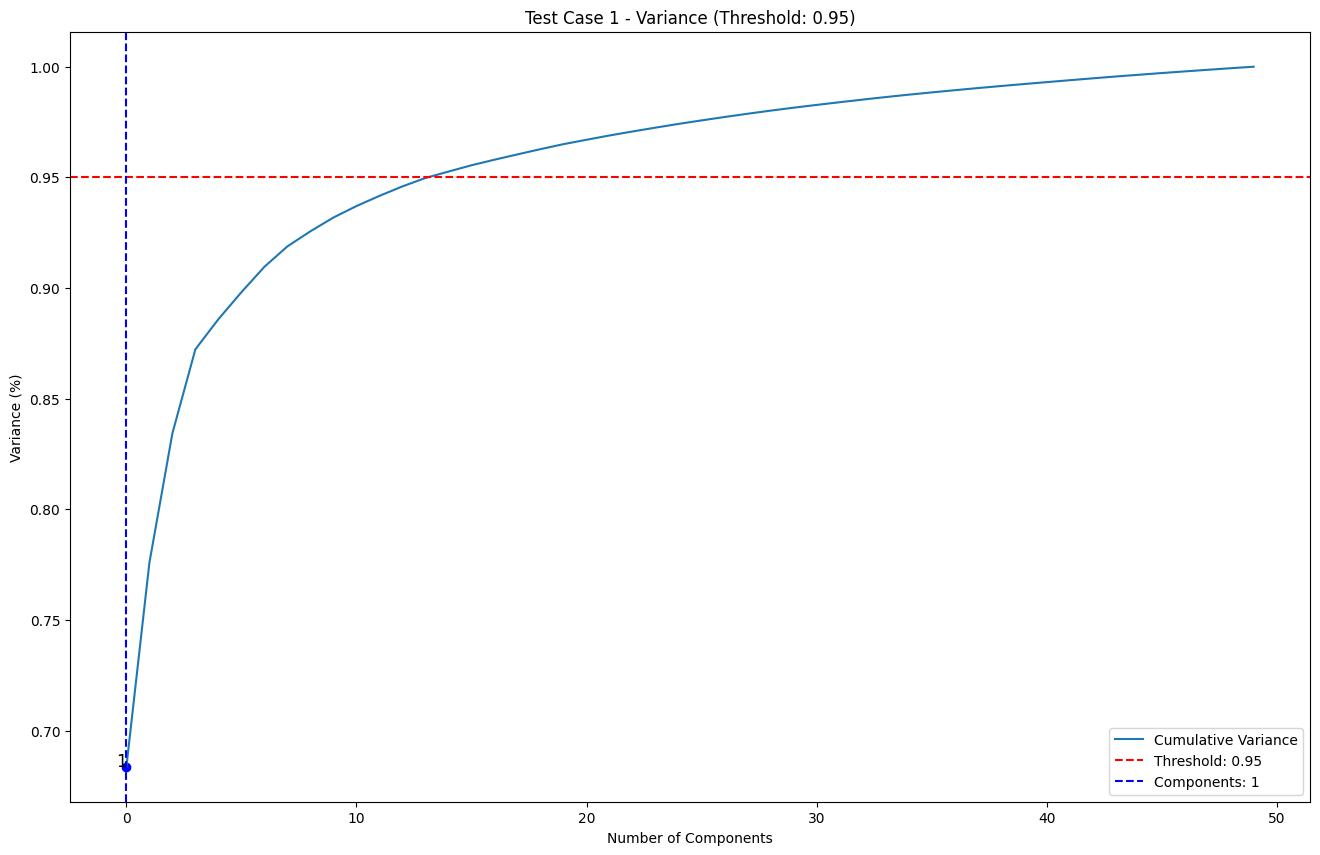

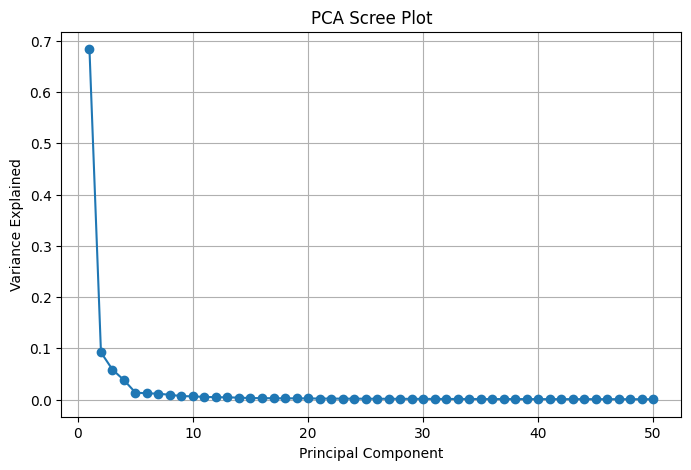

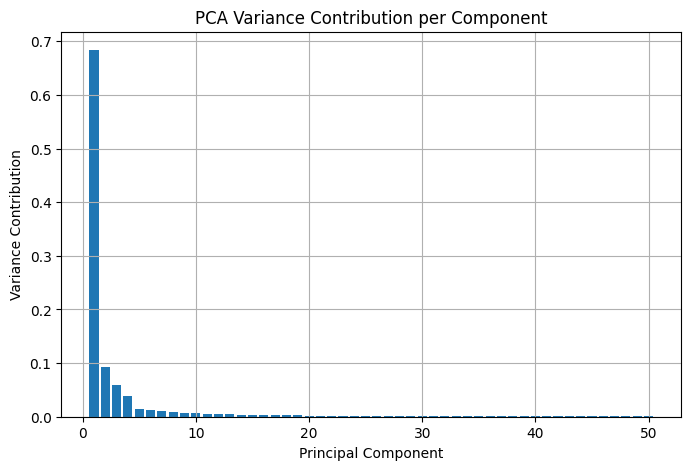

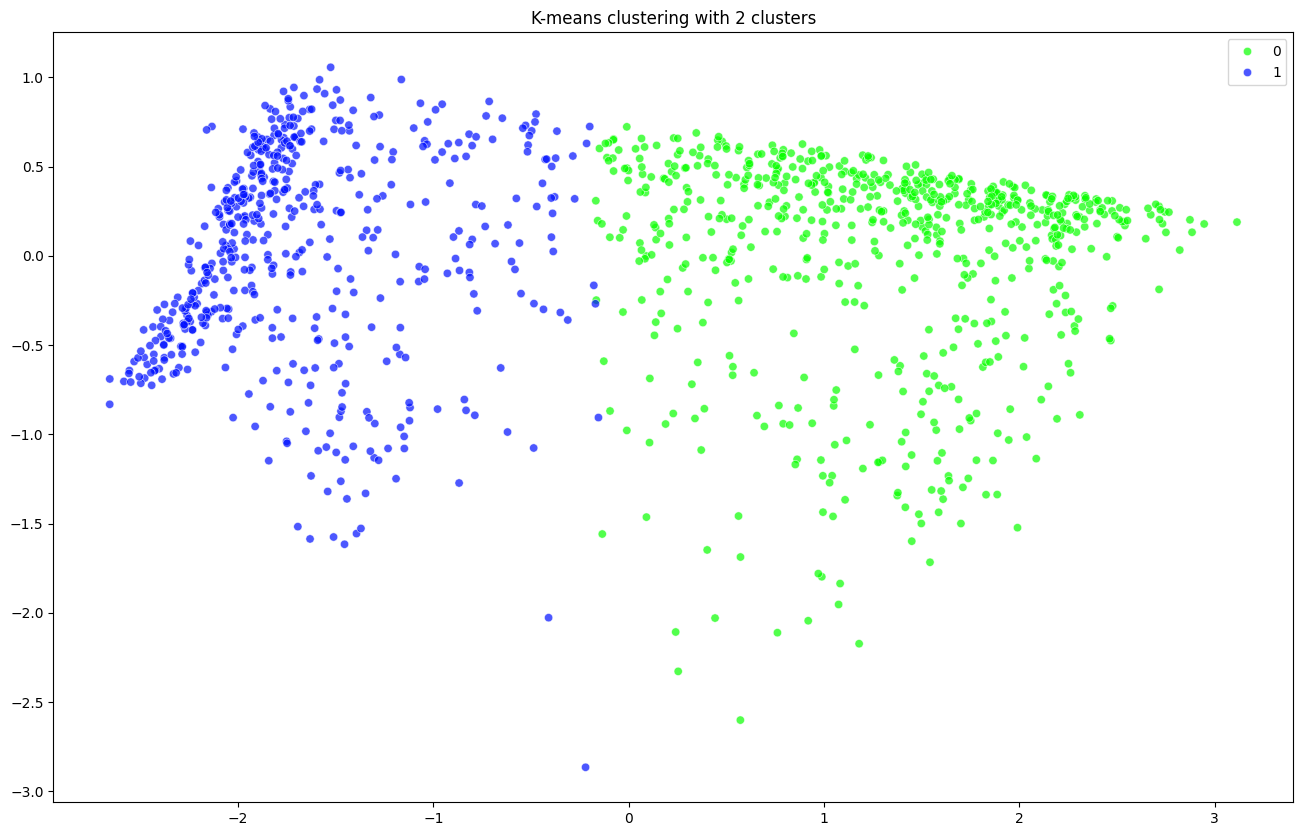

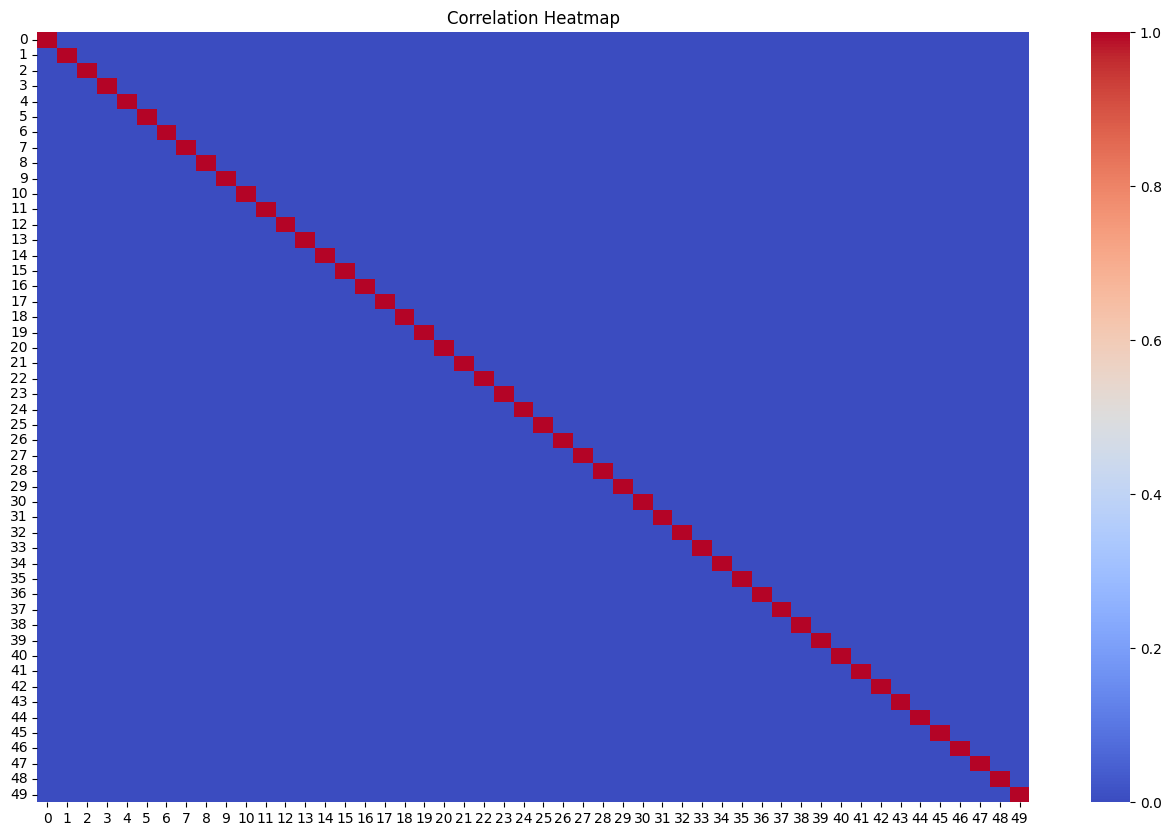


--- Test Case 2: select_data({'attention_weights': True}) ---
Final data shape: (1219, 529)
Data shape: (1219, 529)


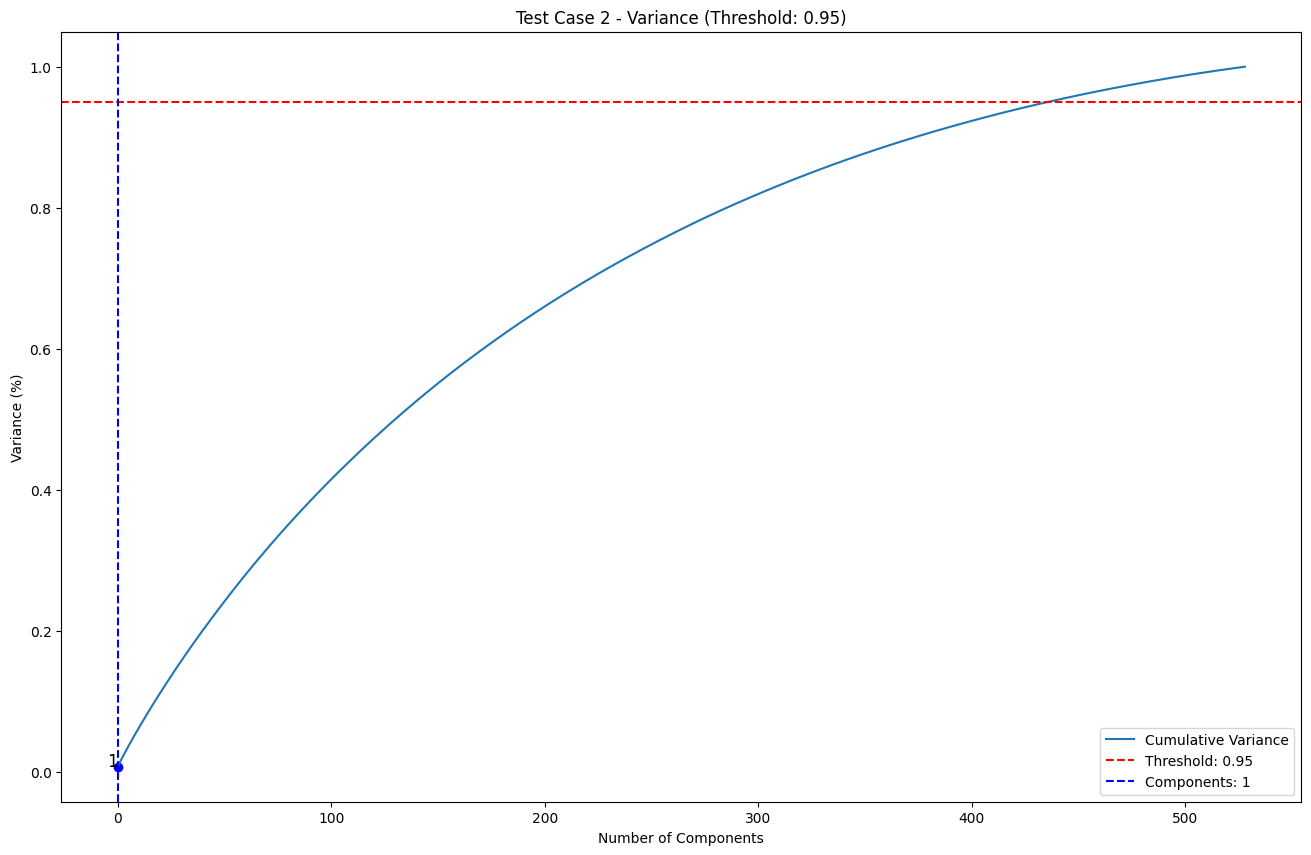

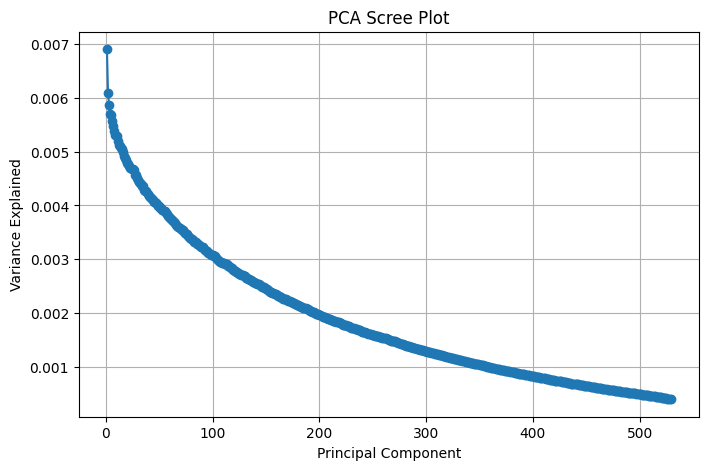

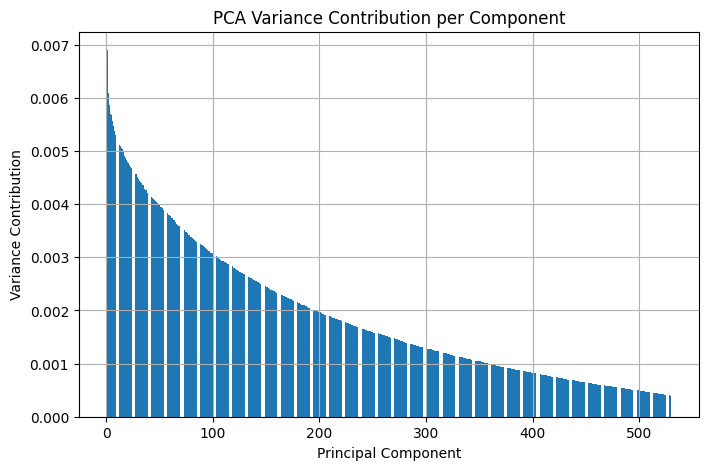

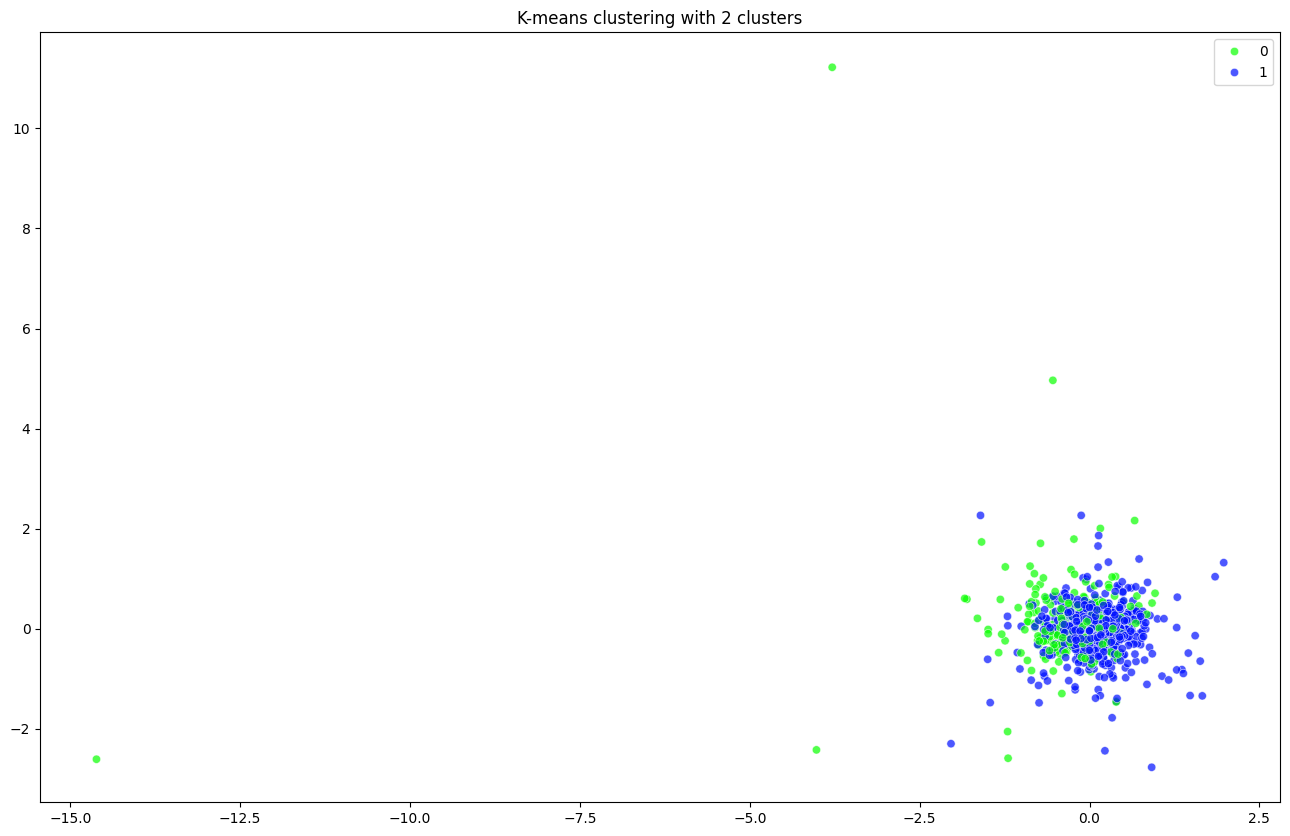

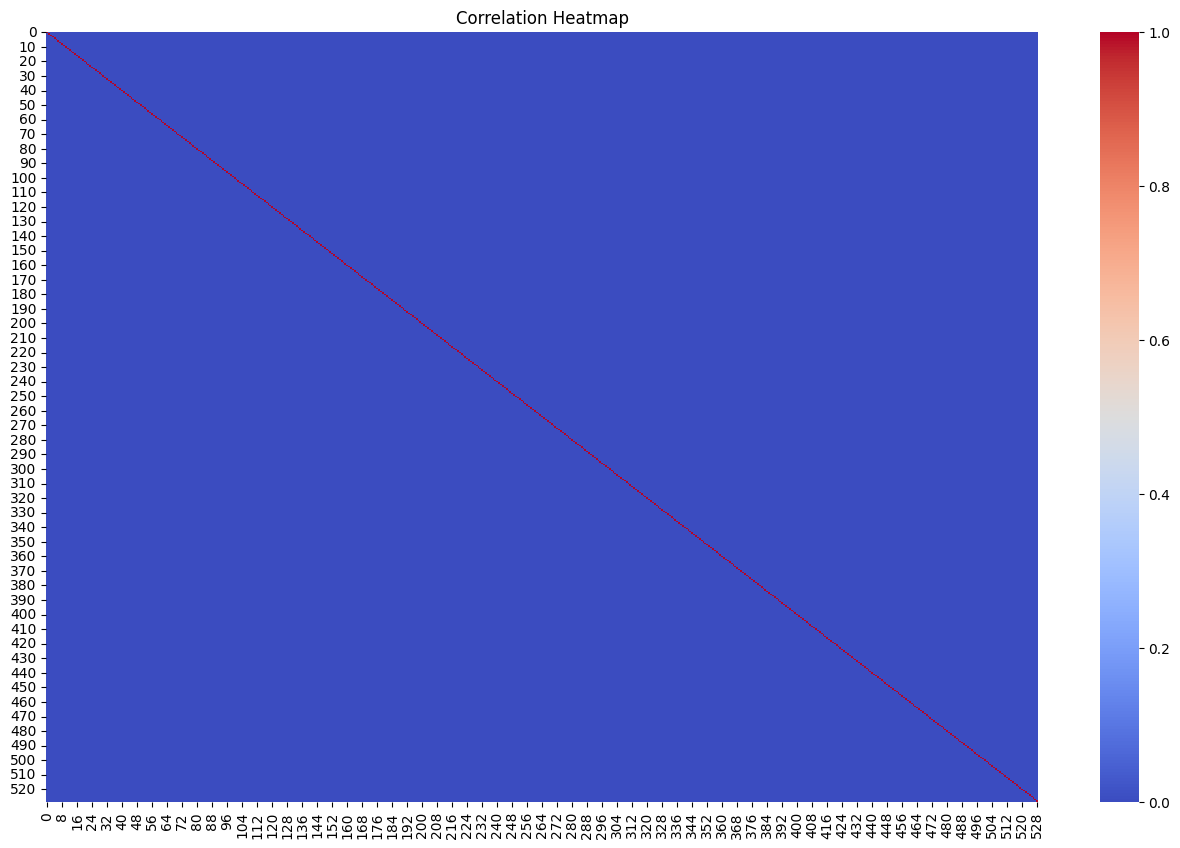


--- Test Case 3: select_data({'embedding': True, 'attention_weights': True}) ---
Final data shape: (1219, 579)
Data shape: (1219, 579)


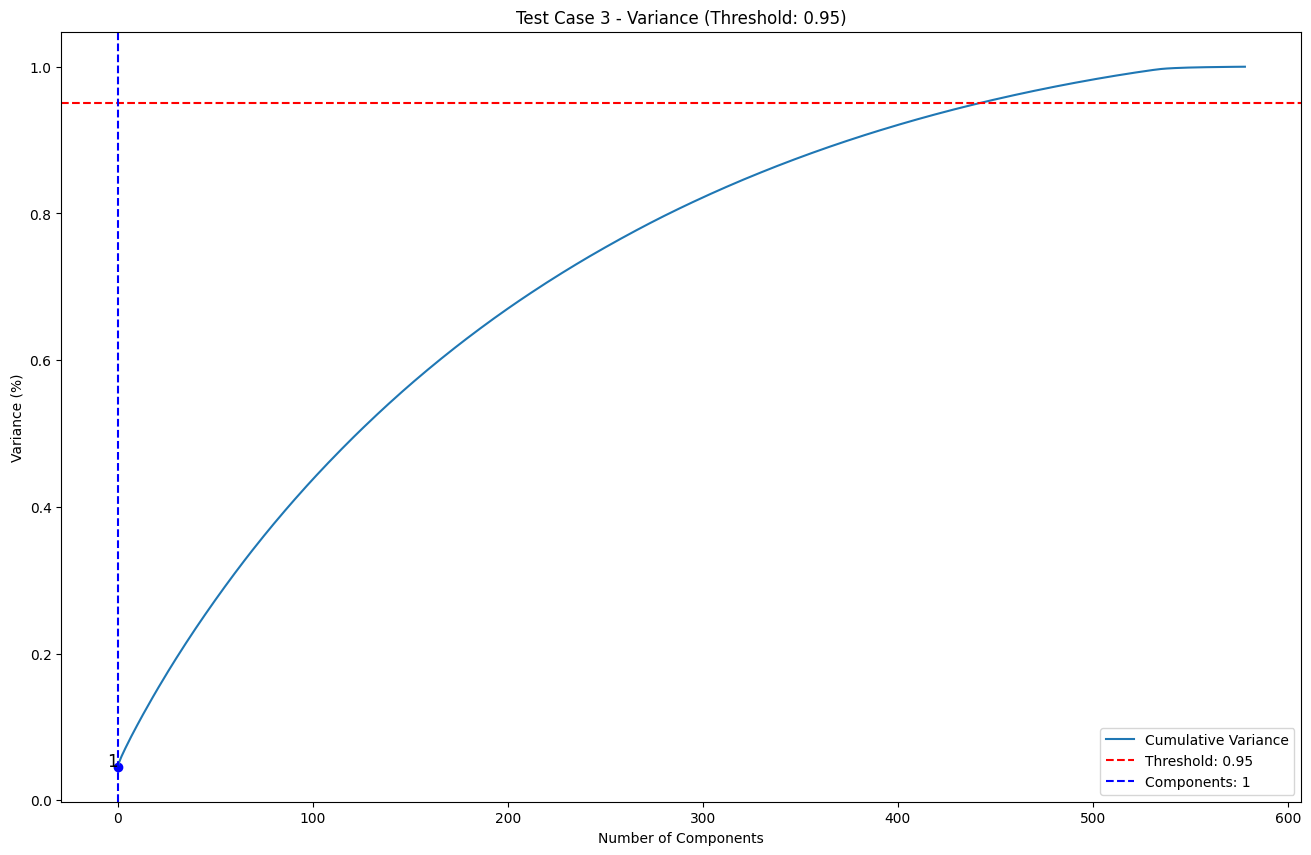

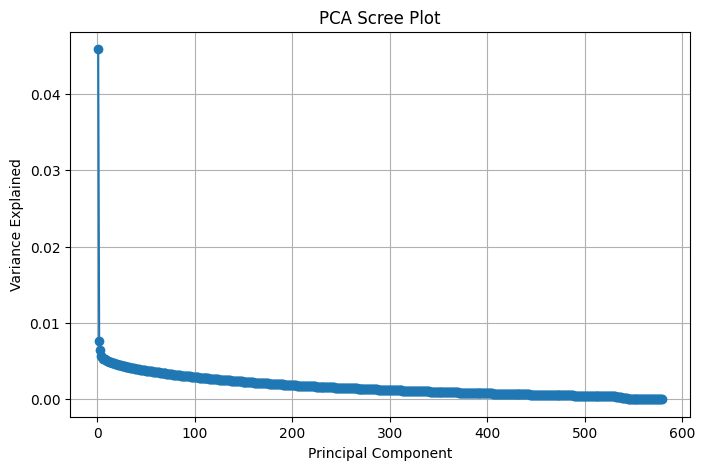

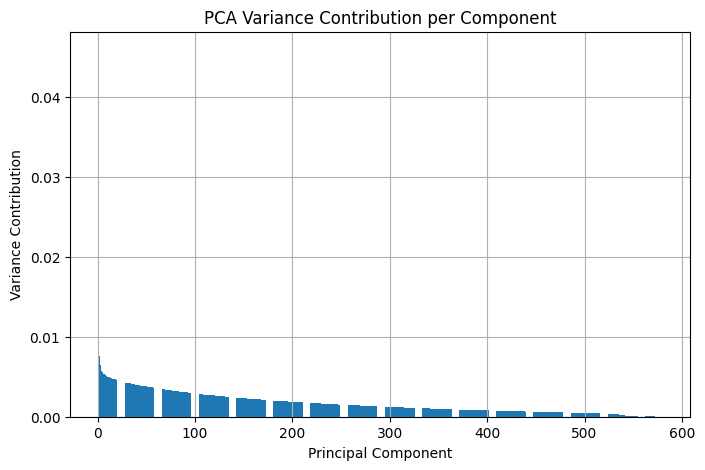

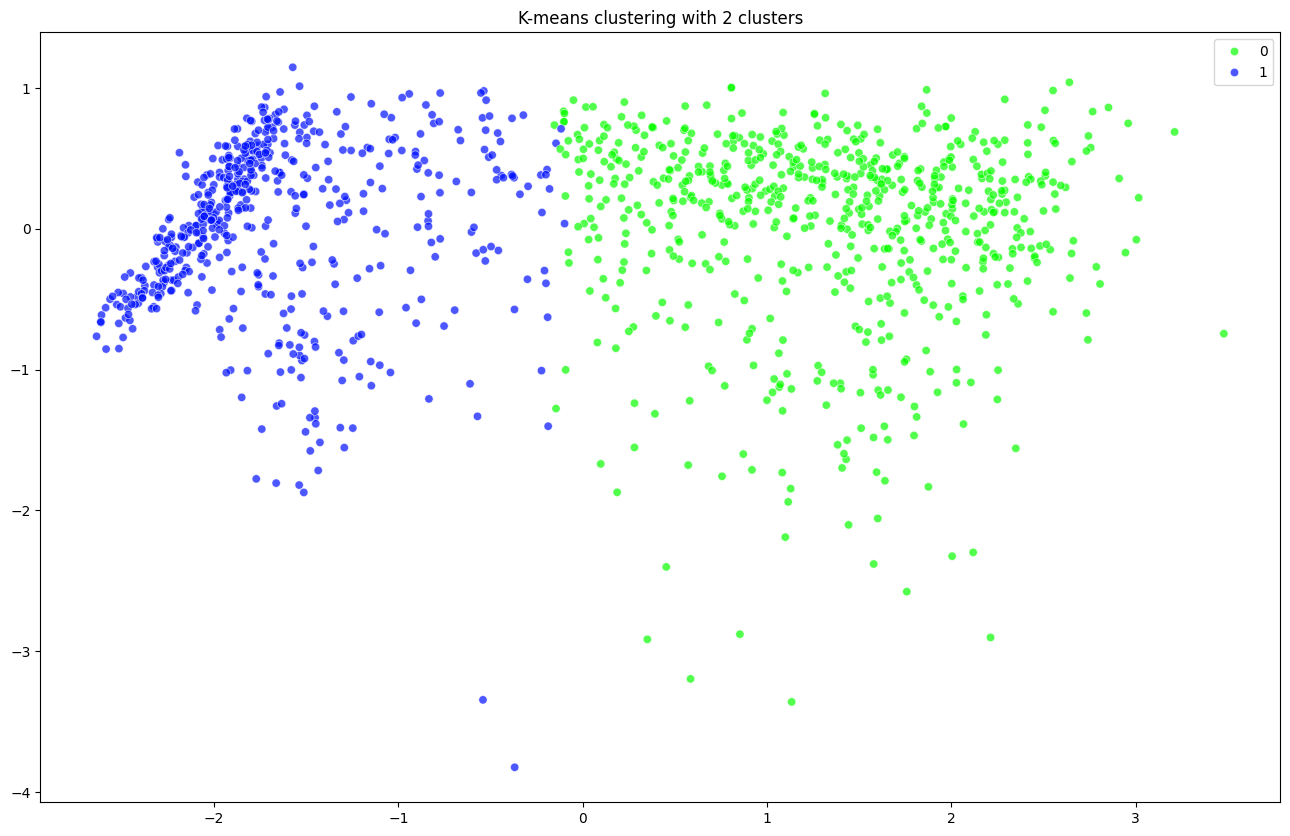

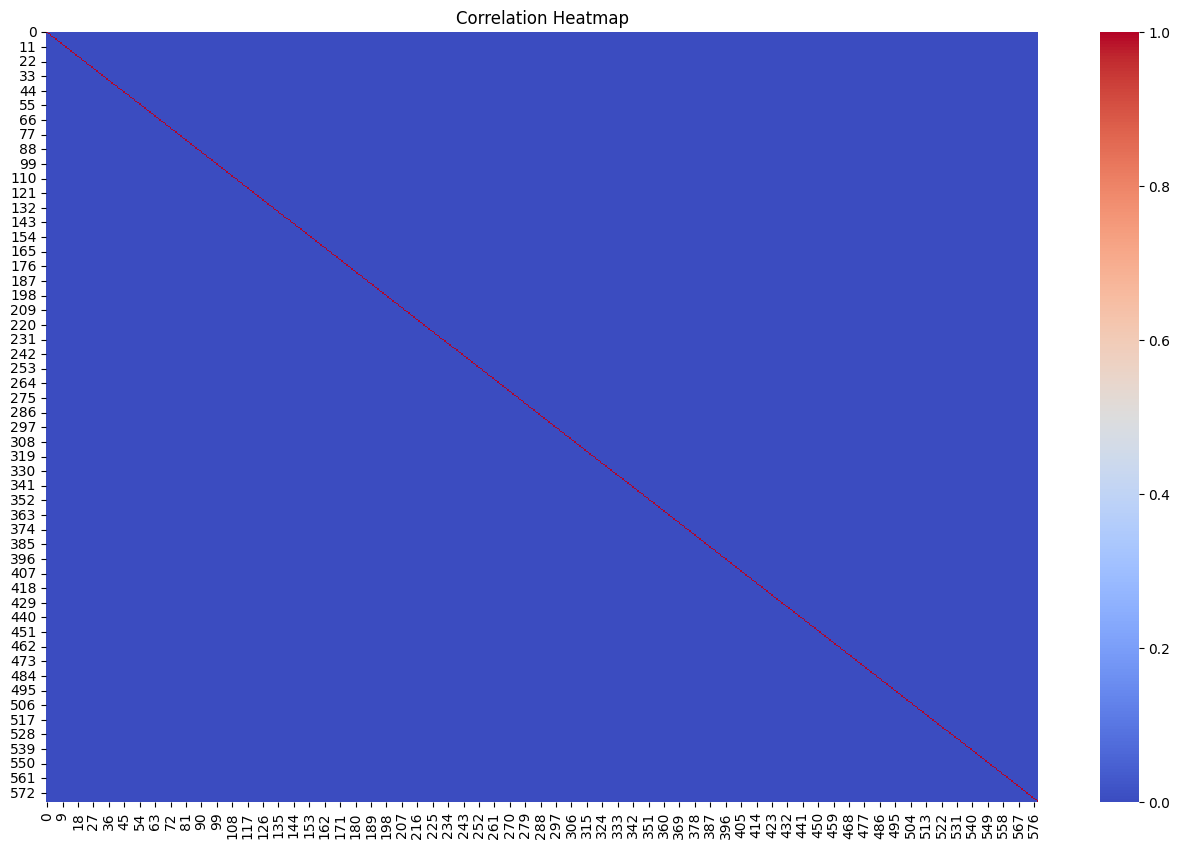


--- Test Case 4: select_data({'attention_weights': True, 'target_column': True}) ---
Adding labels to data...
Shape data before adding: (1219, 529) | Shape labels: (1219, 1)
Final data shape: (1219, 530)
Data shape: (1219, 530)


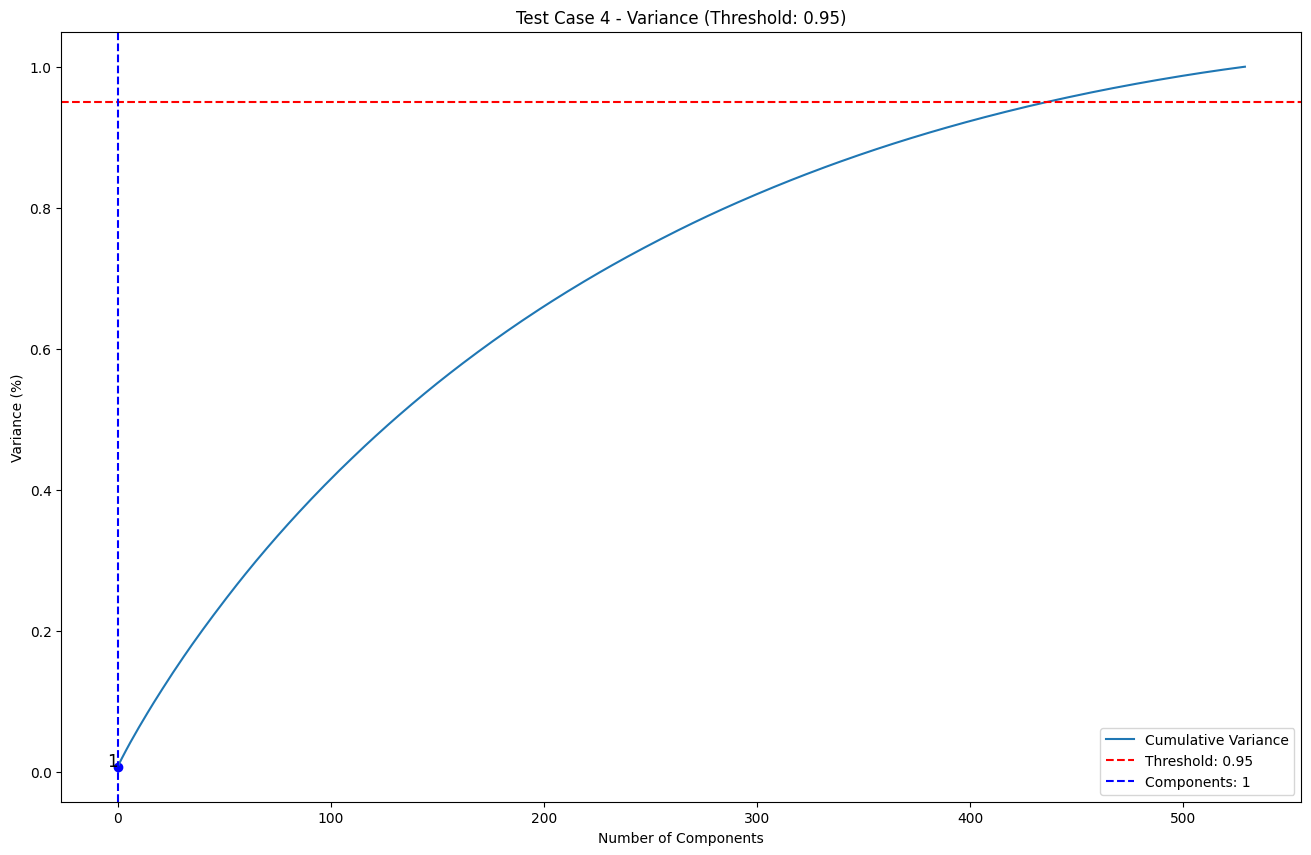

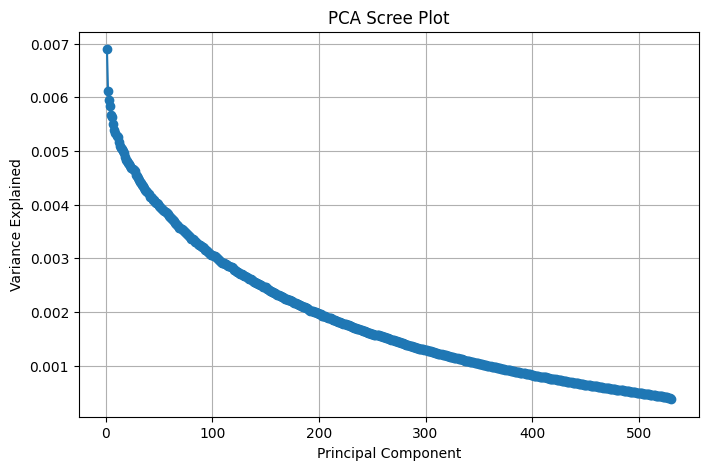

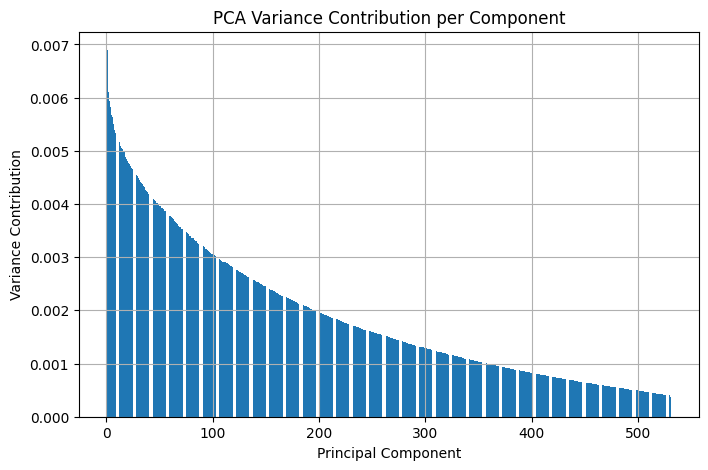

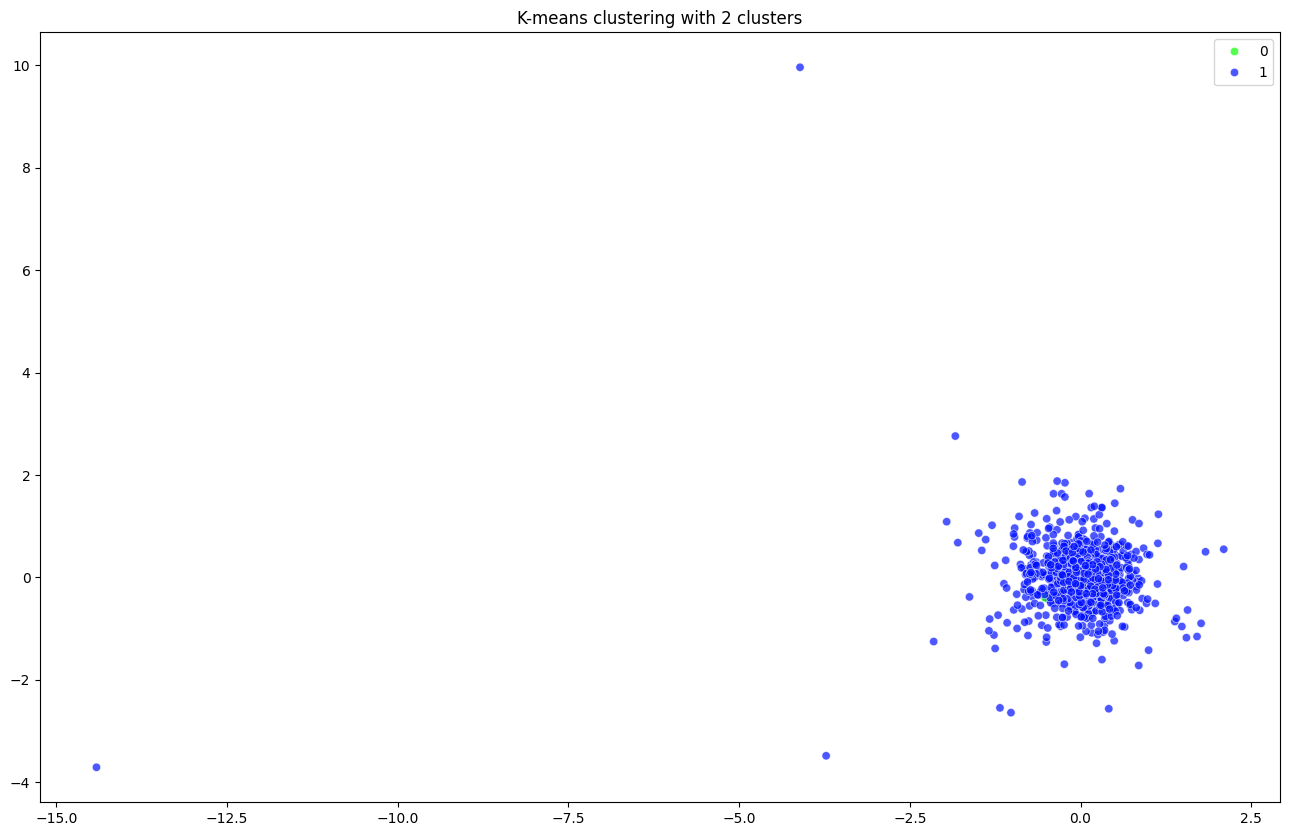

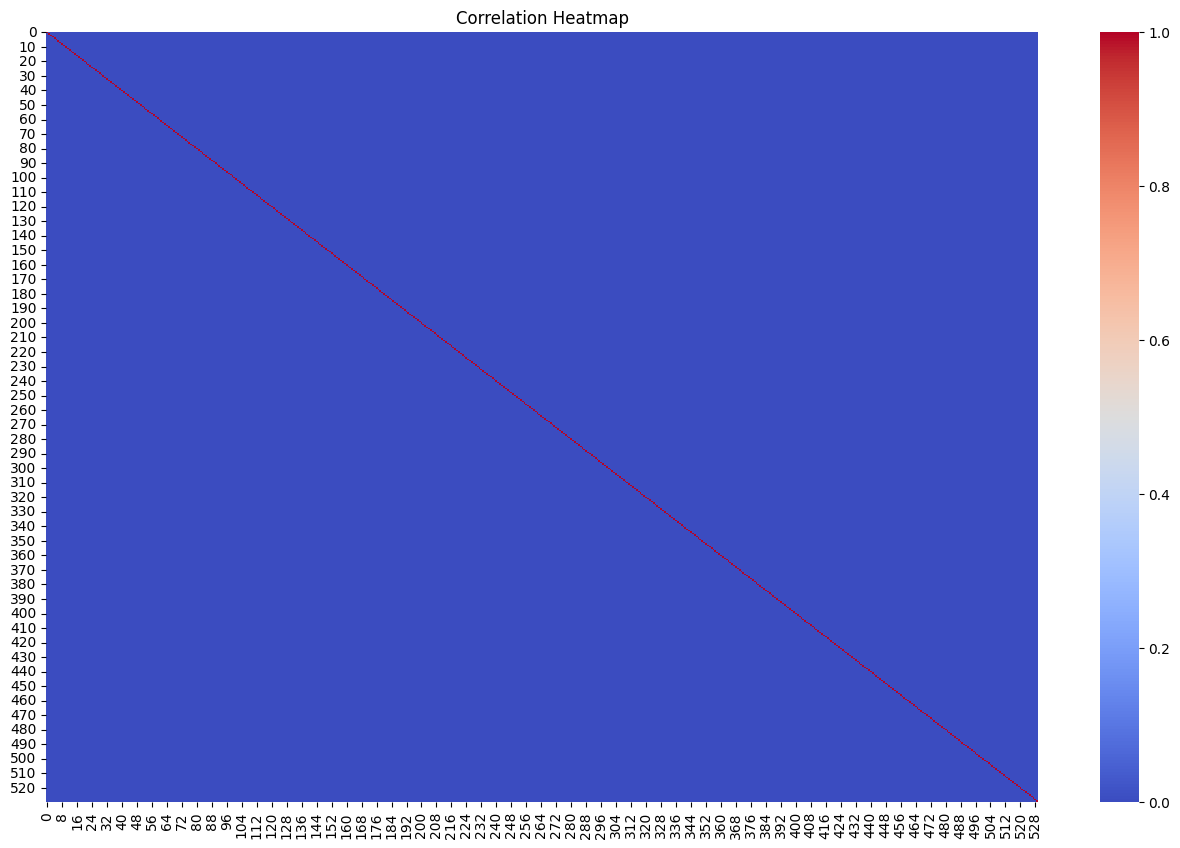


--- Test Case 5: select_data({'embedding': True, 'attention_weights': True, 'target_column': True}) ---
Adding labels to data...
Shape data before adding: (1219, 579) | Shape labels: (1219, 1)
Final data shape: (1219, 580)
Data shape: (1219, 580)


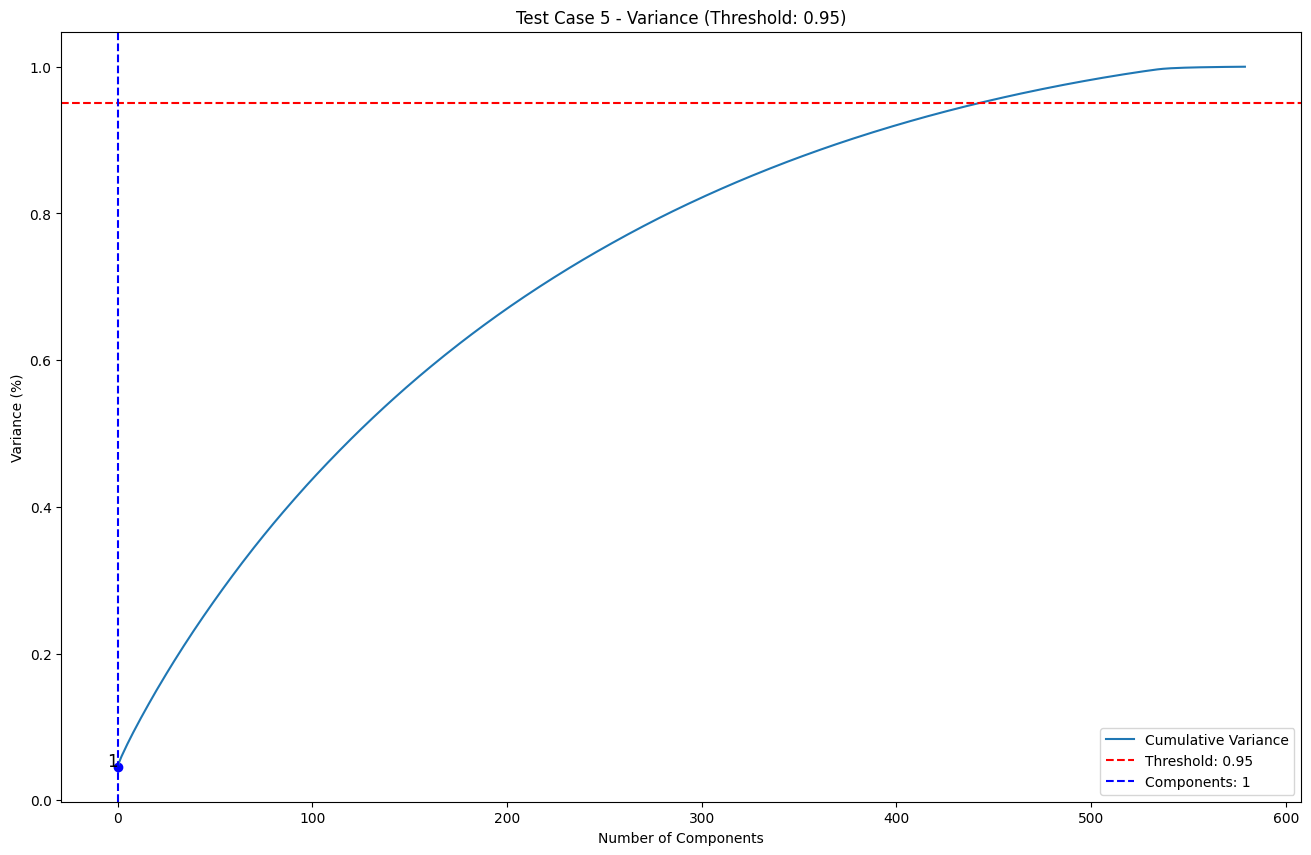

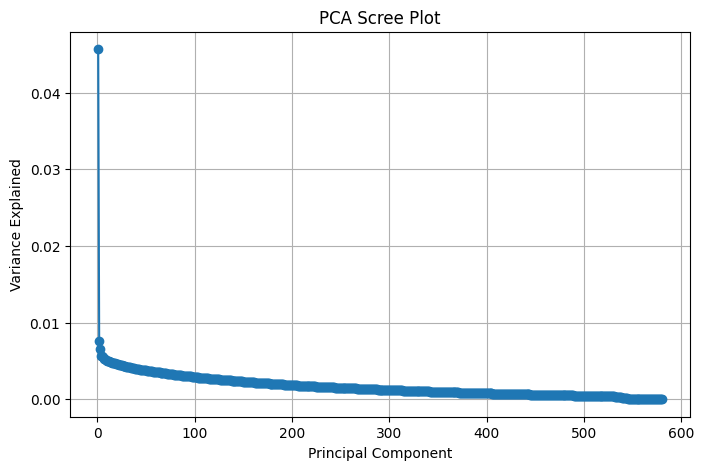

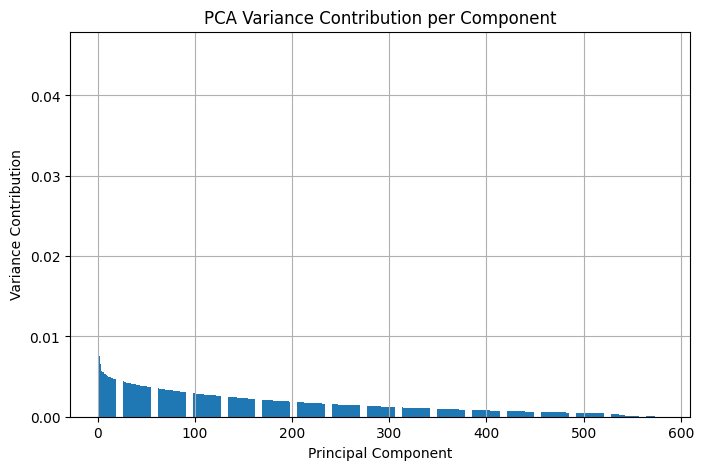

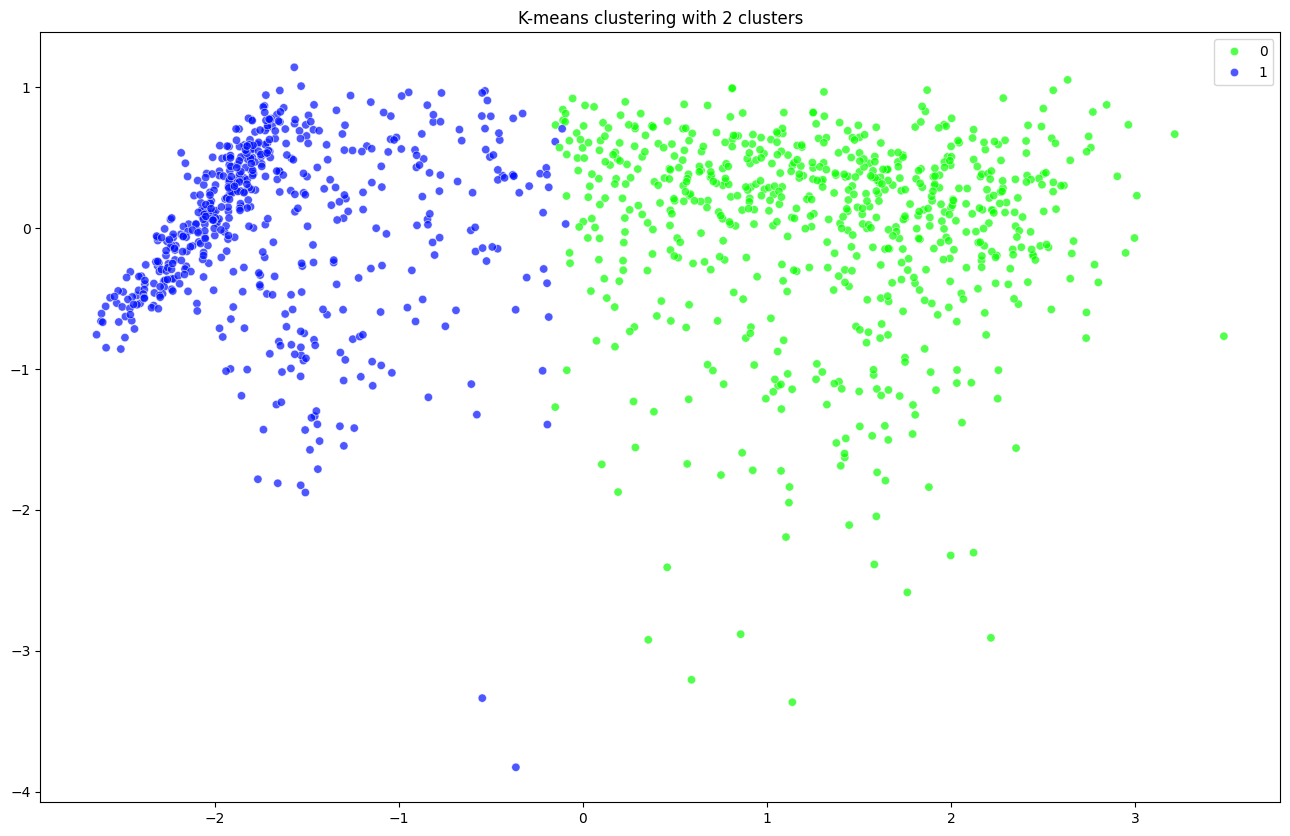

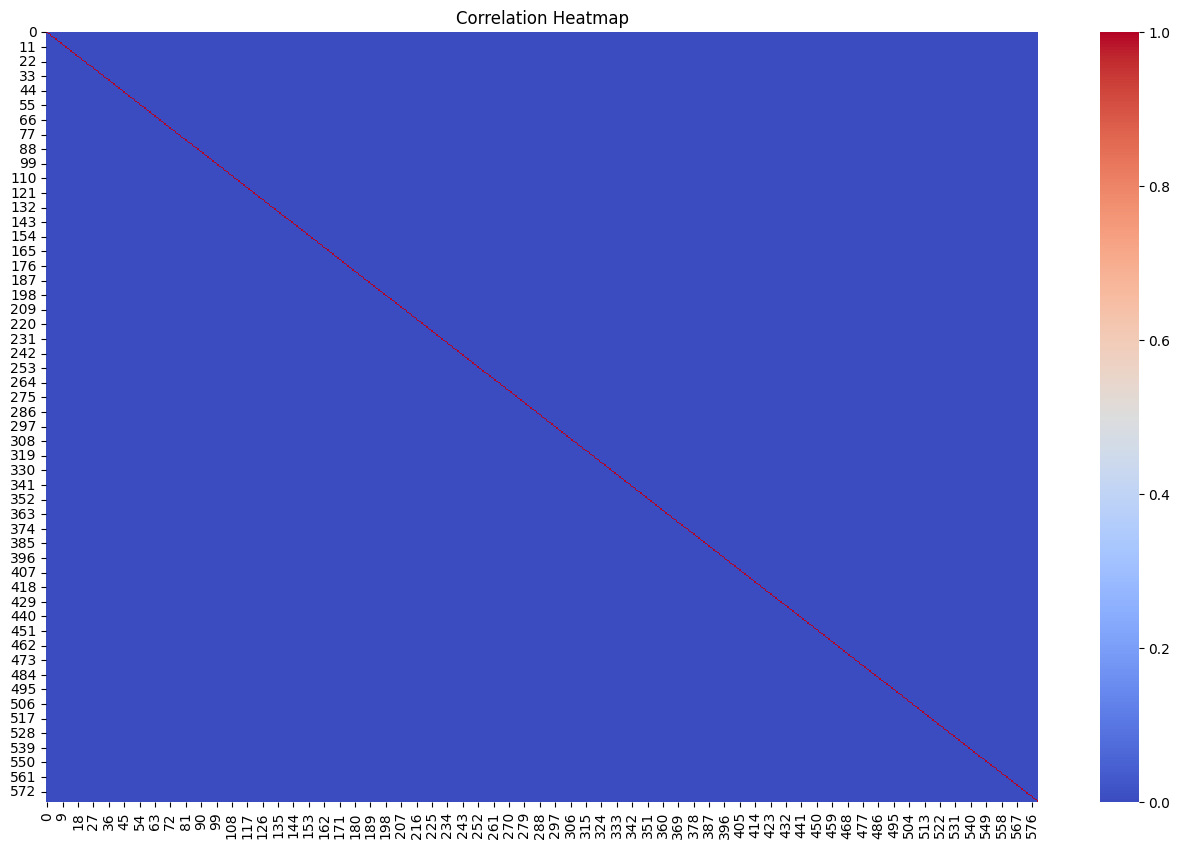


--- Test Case 6: select_data({'embedding': True, 'attention_weights': True, 'additional_columns': ['Max_MBL_CC', 'Max_MBL_MF', 'Highest_MBL']}) ---
Adding additional columns to data...
Shape data before adding: (1219, 579) | Shape column: (1219, 1)
Shape data before adding: (1219, 580) | Shape column: (1219, 1)
Shape data before adding: (1219, 581) | Shape column: (1219, 1)
Final data shape: (1219, 582)
Data shape: (1219, 582)


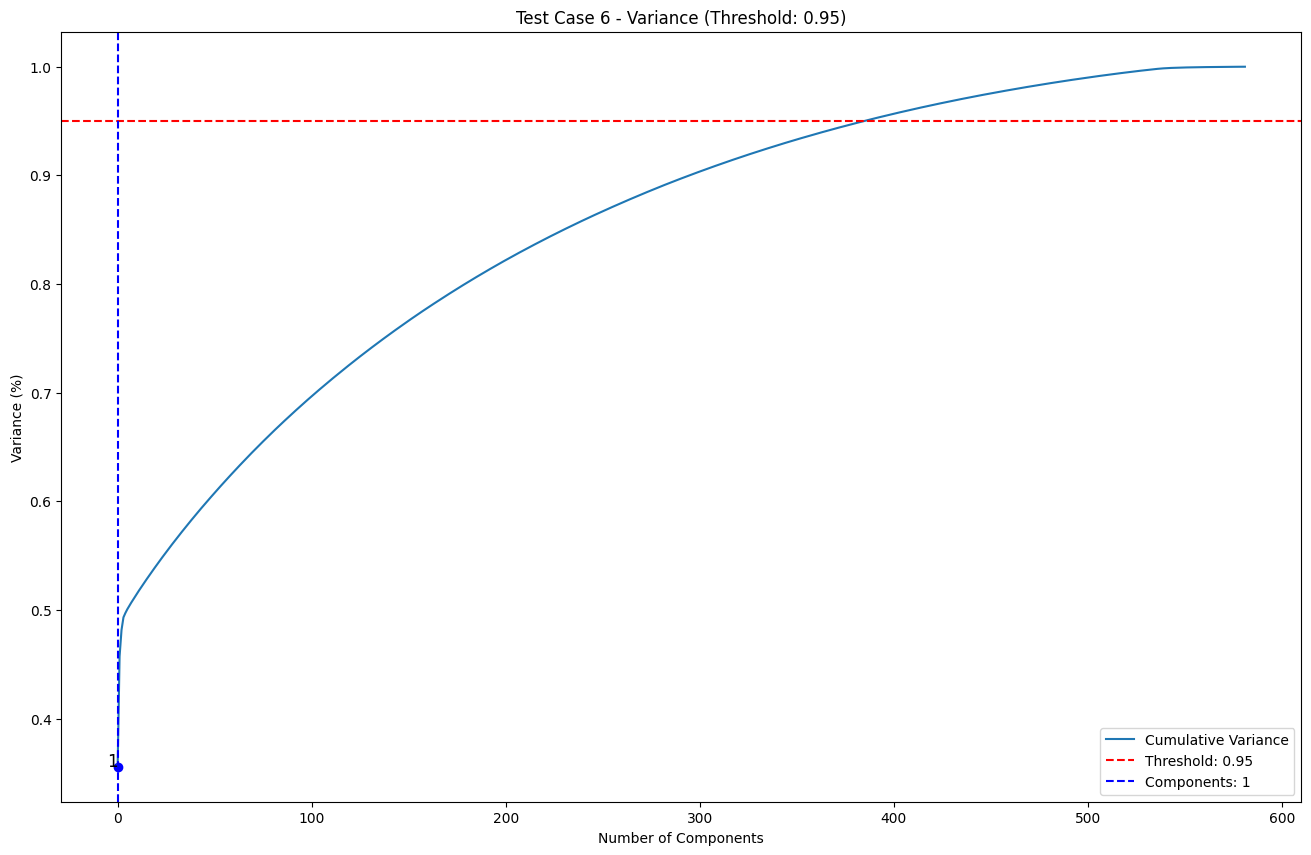

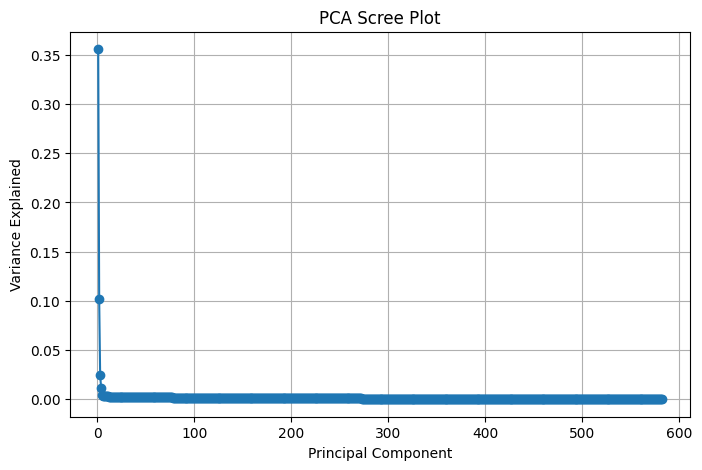

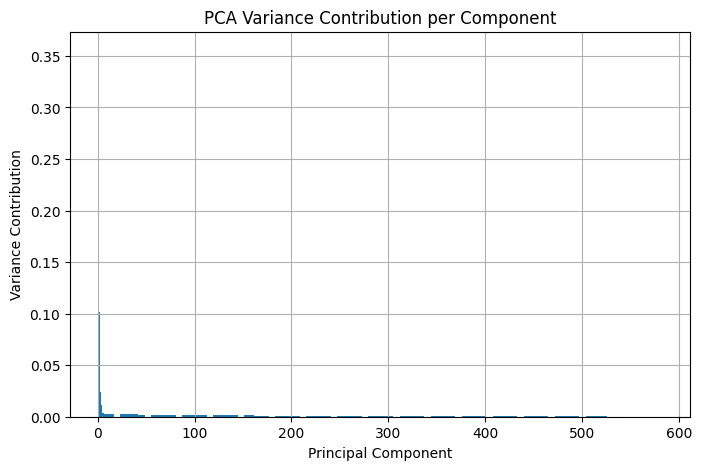

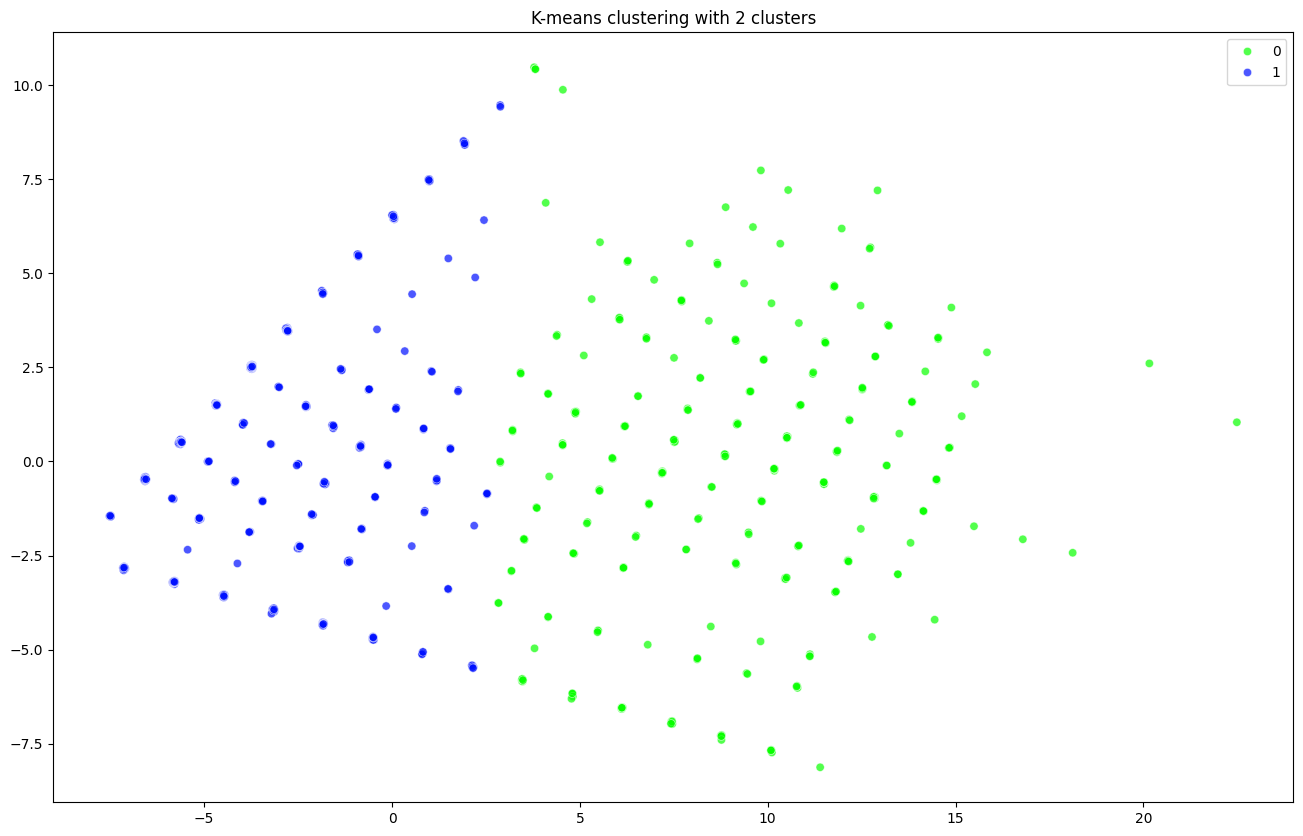

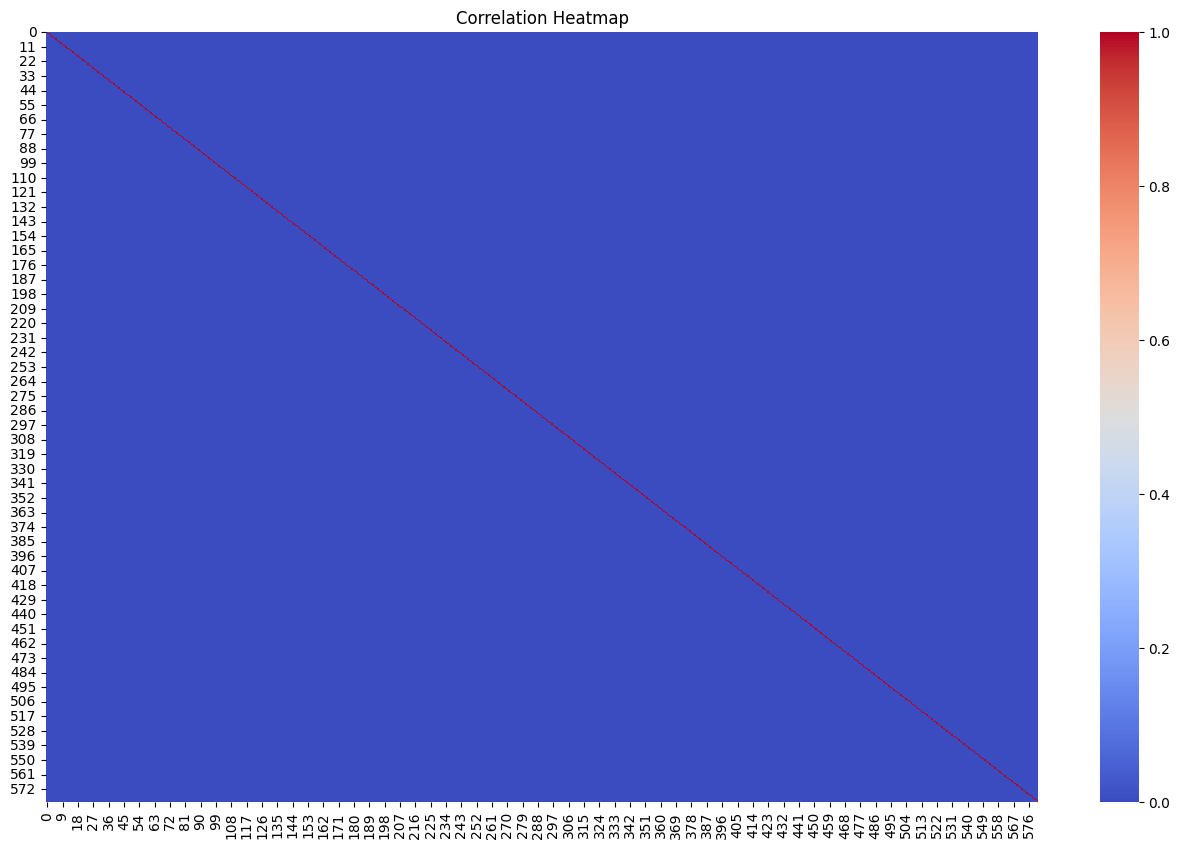

In [14]:
# Step 3: Test all select_data() combinations and run plots
def test_select_data_combinations():
    combinations = [
        {'embedding': True},
        {'attention_weights': True},
        {'embedding': True, 'attention_weights': True},
        {'attention_weights': True, 'target_column': True},
        {'embedding': True, 'attention_weights': True, 'target_column': True},
        {'embedding': True, 'attention_weights': True, 'additional_columns': ['Max_MBL_CC', 'Max_MBL_MF', 'Highest_MBL']},
    ]

    for i, combo in enumerate(combinations):
        print(f"\n--- Test Case {i+1}: select_data({combo}) ---")
        try:
            data = dataset_pca.select_data(**combo)
            if isinstance(data, list):
                data = np.array(data)
            if data.shape[1] > 2:
                print(f"Data shape: {data.shape}")
                # Reduce to 2D for plotting
                pca = PCA(n_components=data.shape[1])
                reduced = pca.fit_transform(data)
                DataVisualizer.plot_variance_explained(pca, title=f"Test Case {i+1} - Variance")
                DataVisualizer.plot_scree(pca)
                DataVisualizer.get_loadings(pca)
                DataVisualizer.plot_variance_contribution(pca)
                DataVisualizer.plot_kmeans(reduced, n_clusters=2)
                DataVisualizer.plot_correration_heatmap(reduced)
            else:
                print("Data too small for PCA or plotting.")
        except Exception as e:
            print(f"❌ Test Case {i+1} failed: {e}")

# Run the tests
test_select_data_combinations()

In [7]:

# ➤ Option C: Use t-SNE for visual exploration
dataset_tsne = WrappedProteinDataset(
    dataset=protein_dataset,
    reduce_method='tsne'            # Use only for 2D plotting, not for training
)

Converting embeddings and attention weights to NumPy arrays...
Applying random projection to reduce attention weights from 6255001 to 1000 dimensions...
Applying dimensionality reduction using tsne...


Final data shape: (1219, 579)


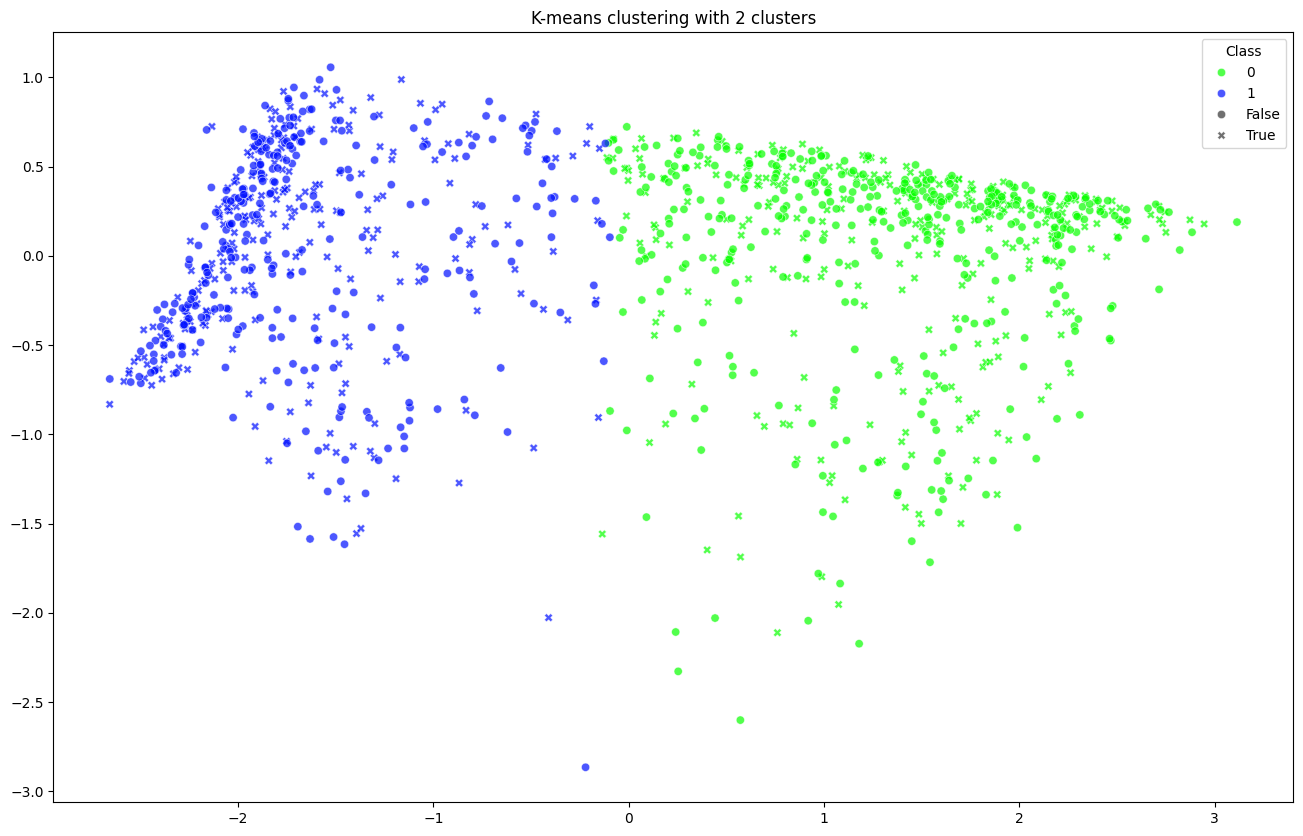

Final data shape: (1219, 2)


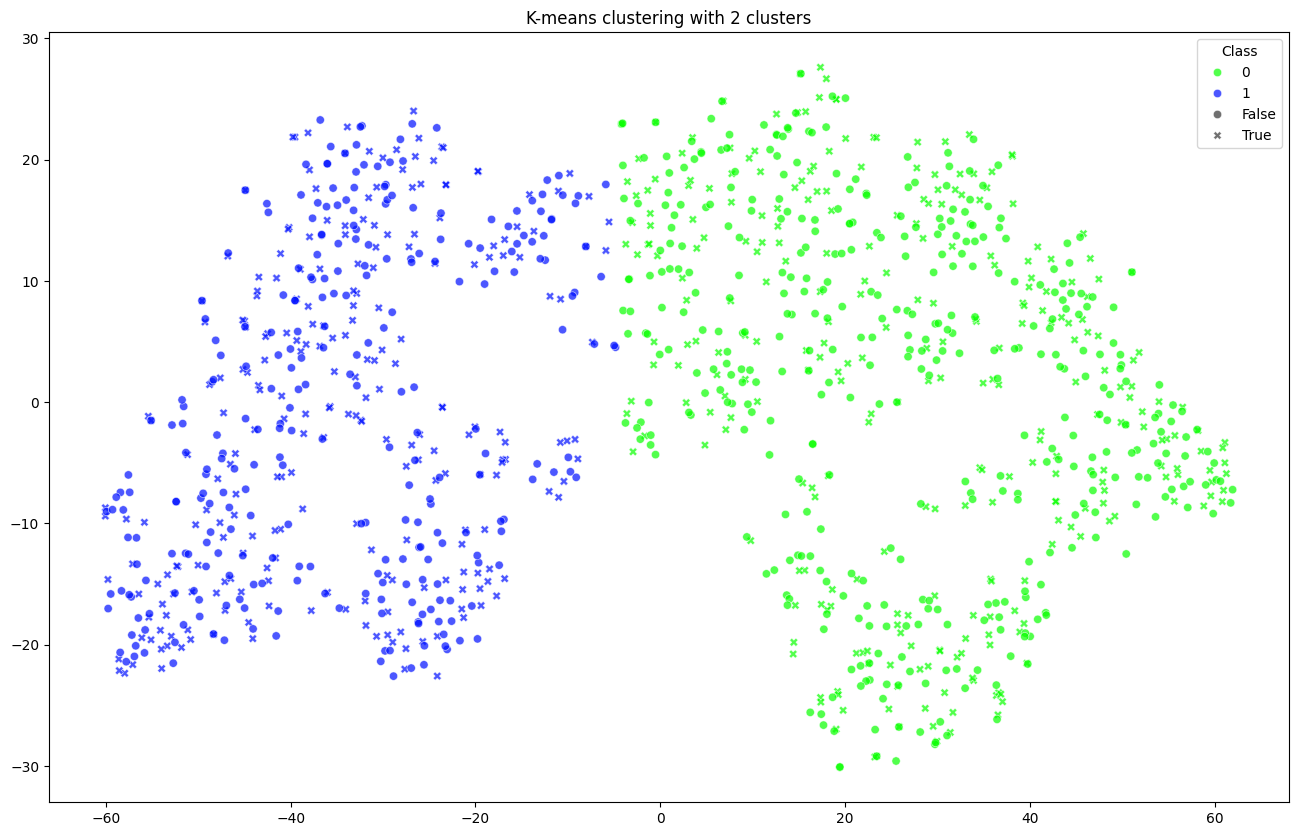

✅ Demo complete.


In [ ]:
# ------------------------------------------------------
# 🌀 4. Cluster Visualization Example
# ------------------------------------------------------

# Visualize clustering using KMeans on combined PCA-reduced features
dataset_pca.plot_kmeans(n_clusters=2, attribute='Class', embedding=True, attention_weights=False)

# Visualize clustering on t-SNE-reduced embeddings
dataset_tsne.plot_kmeans(n_clusters=2, attribute='Class', embedding=True, attention_weights=False)

# ------------------------------------------------------
# 📌 Notes:
# ------------------------------------------------------
# - reduce_method: Choose 'pca', 'tsne', or None
# - pca_method: Use 'threshold' for 95% variance, 'derivative' for elbow
# - random_projection_dim: Optional projection to speed up PCA on high-dim attention
# - get PCA object using: PCA().fit(data)
# - Use PCAExplainability for detailed analysis of components and features
# - Use WrappedProteinDataset as input for training or further analysis

print("✅ Demo complete.")